# <center>Implementation of a Neo-Hookean Hyper-Elastic contitutive model in Python for FEM </center>

<br>

### Juan Camilo Velásquez González- 201610019014

<img style="float: center;"
     src="IM1.jpg"
     width="320"
     height="50">
     

     
<br>
December 04 - Introducción al Método de Elementos Finitos
<br>

## Introduction.


The study of mechanical systems considering non-linear response, has always been a limitation due to the lack of existence of analytical solutions. Nowadays, it is necessary to rely on commercial FEA packages to study so, but it brings limitations for some research problems due to their rigidity to be manipulated. Using high level programming interfaces like Python, it is possible to implement the mathematical formulation of those kind of models and make them more flexible for applications. One of those models is the Hyper-elastics model. Hyperelastic constitutive laws are used to model materials that respond elastically when subjected to large strains. This model accounts for large shape deformations and a section of non-linear behavior, which makes it ideal to model rubberish polymers.  In this project, the main goal was to implement the integration and solution scheme (Newton Raphson) for that particular model , including pre-processing, solution and post-processing algorithms. A Plane strain elasticity simplification was used, implementing an 8-noded 9-integration points element that allows to account for a wider range of geometries. The post-processing subroutine was taken from SolidsPy to create the nodal field plots. The model was validated against Abaqus CAE using a simple cantilevered beam problem using CPE8 elements and the same boundary conditions. The problem was solved using both types of boundary values, displacement, and load control.  After the validation, it was found that the model presents a high accuracy when compared to the results of the commercial FEA, with mean errors lower than 5%. 

## Hipotesis and Formulation

- Planar elasticity was implemented. Plane Strain elements.
- Each node on the element has 2 DOF's.
- Unitary properties were used for the validation, to avoid and possible mis-result caused by this parameter.
- A incompressible material relation was simulated, using a $\kappa_1>>\mu_1$
- No body forces were included in the code.
- The code does not account for surface tractions, it only includes direct nodal loads specification.

The element that was implemented has the following enumeration:

<img style="float: center;"
     src="./img/NB10.png"
     width="250"
     height="50">
     
The formulation was taken from the Allan Bower's Book of SolidMechanics, in the chapter 8.4.

For a Hyper-Elastic Neo-Hookean model, the stress for any material point can be calculated as:
$$\sigma_{ij}=\frac{\mu_1}{J^{5/3}}(B_{ij}-\frac13B_{kk}\delta_{ij})+\kappa_1(J-1)\delta_{ij}$$

Where:

$$J=det(F)$$

$$F_{ij}=\delta_{ij}+\frac{\partial u_i}{\partial x_j}$$

$$B=F_{ik}F_{jk}$$

With this particular formulation, and expressing the virtual work principle in terms of this stress definition, the equaition governing this system are:

$$\int_{V_0}\tau_{ij}\delta L_{ij}dV_0-\int_{V_0}\rho_0b_i\delta v_{i}dV_0-\int_{S_t}t^*_i \delta v_i \eta dA=0$$

Where:

- $\delta v_i:$ Virtual velocity 
- $\delta L_{ij}:$ Virtual velocity gradients
- $\tau_{ij}=J\sigma_{ij}$ :Kirchhoff stress
- $\eta:$ Inverse surface Jacobian

After the linearization and discretization of the equations, it yields a system of linear equations:

$$K_{aibk}dw^b_k+R^a_i-F^a_i=0$$

$$\forall \{a,i\}: x^a_k \notin S_u$$

Where:

$$K_{aibk}=\int_{V_0}C_{ijkl}\frac{\partial N^a}{\partial y_{j}}\frac{\partial N^b}{\partial y_{l}}dV_0-\int_{V_0}\tau_{ij}\frac{\partial N^a}{\partial y_{k}}\frac{\partial N^b}{\partial y_{j}}dV_0$$

$$R^a_i=\int_{V_0}\tau_{ij}\frac{\partial N^a}{\partial y_{j}}dV_0$$

The terms on the stiffness matrix are calculated as follows:
$$\frac{\partial N^a}{\partial y_{i}}=\frac{\partial N^a}{\partial x_{j}}F^{-1}_{ji}$$

$$C_{ijkl}=\frac{\mu_1}{J^{2/3}}\left(\delta_{ik}B_{jl}+B_{il}\delta_{jk}-\frac{2}{3} \{B_{ij}\delta_{kl}+B_{kl}\delta_{ij}\}+\frac{2}{3} \frac{B_{qq}}{3} \delta_{ij} \delta_{kl}\right)+\kappa_1 (2J-1)J \delta_{ij}\delta_{kl}$$

For this particular implementation, it was decided that the forces must be applied directly on the nodes, no body forces, or surface tractions were included in the model.

## 2.  Files Description.

The code is divided into three main files:
- **FEM_Hyperelastic:** Contains the integration scheme of the elemnt, including the coefficients matrix and the right hand side of the system of equations.
- **NR_Hyper:** This file is the core of the program. In containts the Newtom-Raphson implementation, and form there all the subrotines are called.
- **post_process:** This subroutine is imported form SolidsPy and contains all the elements requiered to create the fiels plots of stress, strain and displacement.

For the solution, the only file that need to be executed is NR_Hyper. To be able to run it, 4 separate files need to be stored in the **/files** folder. They contain all the input information for the solver.

The problem parameters are:

> - **Load-Steps**: Parameter defining the number of steps for the subdivision of the total load throughout the simulation.
> - **Tolerance:** Precision employed to control the Newton-Raphson iterations (dimensionless).
> - **Maximum number of iterations:** Maximum number of Newton-Raphson iterations within a time or deformation increment.
> - **relfact:** Relaxation factor, in case that some major convergence issues are presented, the rigorousness of the algorithm may be sacrified.
> - **materialprops:** ndim array containing the material parameters for the model. In this case is 2X1 array, contaning on its first possition the $\mu_1$ vale, and in the second position the $\kappa_1$



The 4 additional files must contain:

- Node coordinates diffinition
- Element connectivity definition
- Nodal Displacement Boundary Conditions
- Nodal loads boundary conditions

### 2.1. Nodal Coordinates File

The user must include all the nodes with their CX- Coordinate w.r.t x axis, ans CY- Coordinate w.r.r y axis. In this case a mesh from an external mesher can be used. The enumeration must be done starting by 1, the code organices the indexes correctely to work with python notation. This feature is useful when using external meshes i.e Abaqus, because no renumeration must be performed.
<img style="float: center;"
     src="./img/NB2.png"
     width="250"
     height="50">
     
### 2.2. Element connectivity definition

The user must include the topology, following standard 8-noded elements enumeration. The enumeration must be done starting by 1, the code organices the indexes correctely to work with python notation. This feature is useful when using external meshes i.e Abaqus, because no renumeration must be performed.
<img style="float: center;"
     src="./img/NB3.png"
     width="320"
     height="50">
     
### 2.3. Nodal Displacement Boundary Conditions
Nodal displacements are specified in this file. If ISP = 1, this BC will be specified in the y direction; if ISP = 0, this BC will be specified in the x direction. Each displacement is specified by its nodal ID and the load magnitude along a given degree of freedom.
<img style="float: center;"
     src="./img/NB4.png"
     width="200"
     height="50">
     
### 2.4. Nodal loads boundary conditions
Nodal loads are specified in this file. If ISP = 1, this load will be specified in the y direction; if ISP = 0, this load will be specified in the x direction. Each displacement is specified by its nodal ID and the load magnitude along a given degree of freedom.
<img style="float: center;"
     src="./img/NB5.png"
     width="200"
     height="50">


The program is almost completely parametrized, unless is specified. The sections that must be modified are commented, and always appear at the beggining of each subroutine.

## Validation Problem Description

A cantilevered beam was used as the benchmark problem for validation(See figure XX), in this case two methodologies of validation were approached. In first place a load control problem with nodal forces applied on the tip was studied, and then a displacement control problem was approached, in this case a displacement equivalen to the total lenght of the beam was imposed.

<img style="float: center;"
     src="./img/NB6.png"
     width="400"
     height="50">

Ten elements were used along the length of the beam with a structured mesh. The material parameters used for the simulation are:

$$\kappa_1=10$$
$$\mu_1=1$$

For both simulations, the solver parameters were adjusted as follows:

> - **Load-Steps=5**
> - **Tolerance=0.0001**
> - **Maximum number of iterations=30**
> - **relfact=1**

Note: This last parameter must only be modified in cases of severe lost of convergence, but the user should modify the other parameters, otherwise lost of precision may be achieved.




**Case 1:** For the load control case, a load of 0.05N was applied on each of the two nodes in the tip.

<img style="float: center;"
     src="./img/NB7.png"
     width="500"
     height="50">

**Case 2:** For the load control case, a displacement of 9mm was contrained on each of the two nodes in the tip.

<img style="float: center;"
     src="./img/NB8.png"
     width="500"
     height="50">


## Analysis

In [1]:
import numpy as np
import math as mh
import matplotlib.pyplot as plt
import FEM_Hyperelastic as uel
import post_process as ppro
plt.rcParams.update({'font.size': 14})
import warnings
warnings.simplefilter('ignore')

### Additional Sub-routines

All the additional subroutines are stored in the same folder, in this document, only the solver including the NR implememtation will be shown. The mathematical formulation presented on the section *Hypotesis* is coded in the FEM_Hyperelastic.py file.

#### Pre-processing

In [2]:
ncoord=2
ndof=2
n=4

## LOADING OF INPUT FILES
coords=np.loadtxt('nodesC', delimiter=',')
topo=np.loadtxt('elementsC', delimiter=',')
loads=np.loadtxt('loadsC', delimiter=',')
BC=np.loadtxt('bcelesC', delimiter=',')

## ASSIGNMENT OF VARIABLES FROM THE INPUT FILES TO NDIM ARRAYS
coords[:,0]=coords[:,0]-1
topo=topo-1 ### PARAMETER TO BE ABLE TO WORK WITH ABAQUS MESHES
topo=topo.astype(int)
if topo.ndim==1:
    nelem=1
else:
    nelem=topo.shape[0]
nnodes=coords.shape[0]
nBC=BC.shape[0]

## MATERIAL PROPERTIES. IN THIS VERSION, MODIFY MANUALLY [mu_1,kappa_1]
materialprops=np.array([1,10])

## INTIALIZATION OF DISPLACEMENTS VECTOR
U=np.zeros([nnodes*ndof,1])

## SOLVER PARAMETERS FOR THE SIMULATION
loadstep=5
tol=0.0001
maxit=30
relfac=1.

#### Newton-Raphson Implementation
The system's nonlinear response is obtained considering a generalized Newton-Raphson iteration scheme, in which the  stiffness matrix  $𝐾_{stiff}$  is calculated at the time  𝑖  (the beginning of the time step), and then system of equations is solved untel Δ𝑢𝑖 becomes small enough.

<img style="float: center;"
     src="./img/NB9.png"
     width="400"
     height="50">
     
The converge criteris is based on the hypotesis. If the maximum number of iterations for each time increment is achieved, or if the error becomes smaller than the tolerance.


In [3]:
## NEWTON-RAPHSON SCHEME
for itera in range(loadstep):   
    actload=(itera+1)/(loadstep)   
    err=1.
    nit=0
    print('Step', itera)    
    while nit<maxit and err>tol:
        nit=nit+1
        KG,STRESS=uel.assemblystiff(nelem,coords,materialprops,topo,U)        
        RG=uel.assemblyres(nelem,coords,materialprops,topo,U)
        FG=uel.nodalforces(coords,nelem,loads)        
        RHS=actload*FG-RG       
        for n in range(nBC):
            row=ndof*BC[n,0]+BC[n,1]
            row=row.astype(int)
            KG[row,:]=0.
            KG[row,row]=1.
            RHS[row]=actload*BC[n,2]-U[row]        
        dU=np.dot(np.linalg.inv(KG),RHS)       
        U=U+relfac*dU
        nU=U*U
        nU=sum(nU)
        err=dU*dU
        err=sum(err)
        err=mh.sqrt(err/nU)
        ## If you want to check the evolution of the solver, uncomment the following line
        #print('Iteration',nit,'Correction',err,'Tolerance',tol)

Step 0
Step 1
Step 2
Step 3
Step 4


#### Post-processing

In this step basically the information from the solver is stored in a an array with the dimensions and characteristics for the post-processing routine. Also, the stresses and strains are extrapolated from the Gauss integration points to the nodes. 

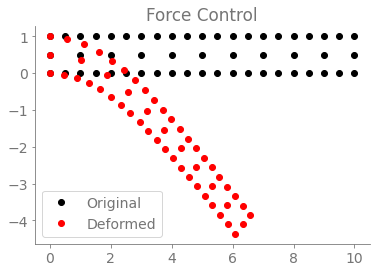

In [4]:
## TRANSFORMATION OF STRESS AND STRAIN FROM IP TO NODES
E_nodes, S_nodes=uel.strain_nodes(nelem,coords,materialprops,topo,U)  


## DISPLACEMENT FIELD ORGANIZATION
dx=U[0:nnodes*ndof:2]
dy=U[1:nnodes*ndof:2]
UV=np.concatenate((dx, dy),axis=1)

## The deformed shape can also be seen in the following plot
plt.figure(0)
scale=0.5
dcoords=coords
plt.plot(coords[:,1],coords[:,2],'o', color='black',label='Original')
dcoords[:,1]=dcoords[:,1]+dx.T*scale
dcoords[:,2]=dcoords[:,2]+dy.T*scale
plt.plot(dcoords[:,1],dcoords[:,2],'o', color='red',label='Deformed')
plt.legend()
plt.title('Force Control')
plt.show()

- Extrapolations of Results

The methodology for extrapolation of results used in this code is based on averaging the results in a node from the results in the inmidiate close nodes. This procedure is ilustrated below:

<img style="float: center;"
     src="./img/NB11.png"
     width="300"
     height="50">


## Results

As the code was developed independently of this NB, it will be executed for the two aformentioned cases (Load and Displacement control). An then, the displacement fields are plotted. There must be taken into account that all results are compared against Abaqus CAE results. The nodal stress and strain fields are not compared directly due to the lack of homogeinity in the results. The method of explapolations used by Abaqus was explored but no clear information was found.

### Case 1: Load Control

In the following section, the comparison between the displacement fields are shown. In that case the value was obtained in the same positions for all nodes in the last step.

**Displacement Results for Python Code:**


In [20]:
from NR_Hyper import topo,coords,UV,E_nodes,S_nodes, UVAB, SABx,SPx,SABxy,SPxy,SABy,SPy,X,SABF,EABF

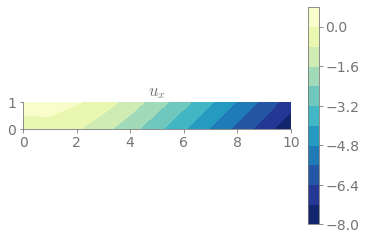

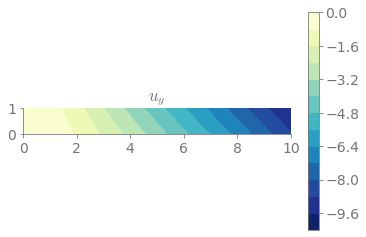

In [21]:
A=ppro.fields_plot(topo, coords, UV, E_nodes=None, S_nodes=None)

**Displacement Results for Abaqus CAE:**

The simulation in this case was executed using CPE8 elements, under the same material and load parameters that in the Python code.

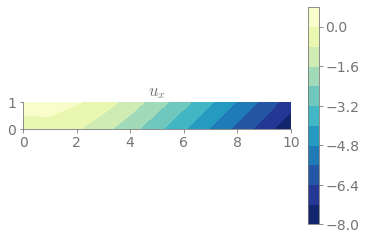

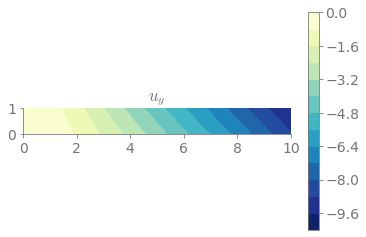

In [22]:
B=ppro.fields_plot(topo, coords, UVAB, E_nodes=None, S_nodes=None)

**Comparison of Results in Displacement**

The absolute error for each point of the fiel was calculated and plotted.

$$Err=||U_{Abq}-U_{Pyt}||$$

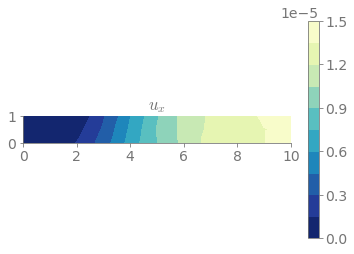

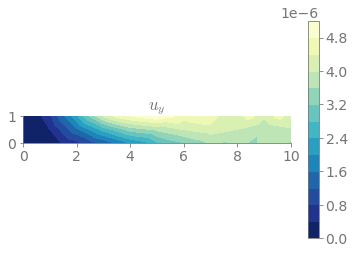

In [8]:
ERR=abs(UV-UVAB)
C=ppro.fields_plot(topo, coords, ERR, E_nodes=None, S_nodes=None)

**Stress Results Comparison:** In this case the stresses were directly compared on the centerline of the beam, extracting the information from the centerline.


Text(0.5, 0, 'Element')

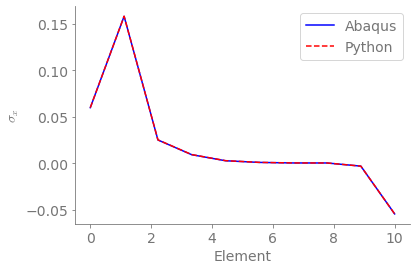

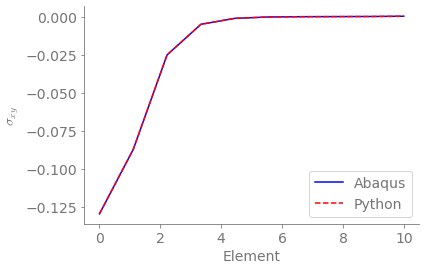

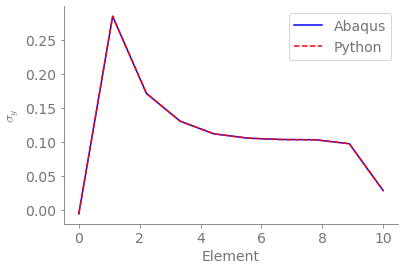

In [9]:
#plt.rcParams["figure.figsize"]=20,20

plt.figure()
plt.plot(X,SABx,'b',label='Abaqus')
plt.plot(X,SPx,'--r',label='Python')
plt.ylabel(r"$\sigma_x$")
plt.xlabel('Element')
plt.legend()
E1=np.linalg.norm(SABx-SPx)

plt.figure()
plt.plot(X,SABxy,'b',label='Abaqus')
plt.plot(X,SPxy,'--r',label='Python')
plt.ylabel(r"$\sigma_{xy}$")
plt.xlabel('Element')
plt.legend()
E2=np.linalg.norm(SABxy-SPxy)

plt.figure()
plt.plot(X,SABy,'b',label='Abaqus')
plt.plot(X,SPy,'--r',label='Python')
plt.ylabel(r"$\sigma_y$")
plt.legend()
plt.xlabel('Element')

#### Addtional Plots:

The field plots for Stresses for both models are presented. The difference in stresses is noticeable, and may be related with the extrapolation procedure

**Python:**

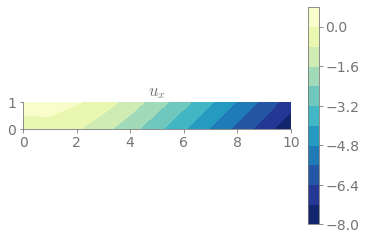

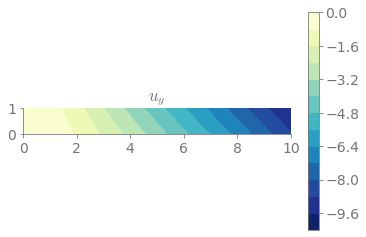

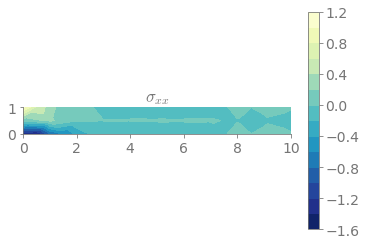

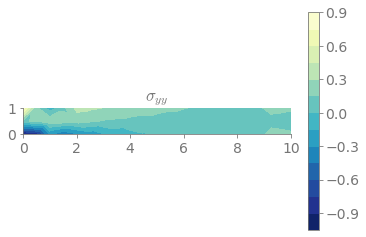

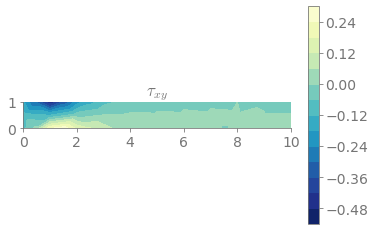

In [10]:
F=ppro.fields_plot(topo, coords, UV, E_nodes=None, S_nodes=S_nodes)

**Abaqus:**

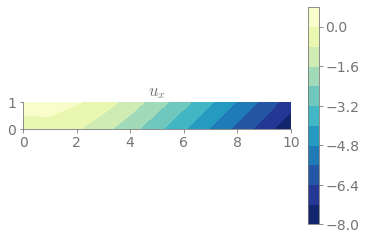

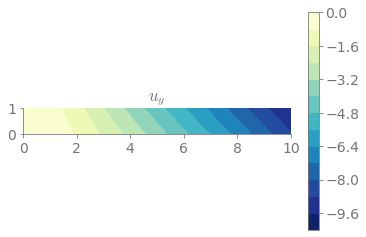

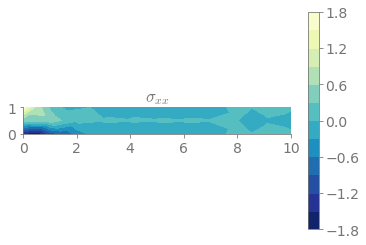

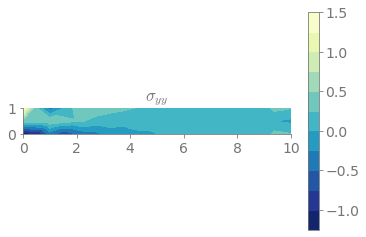

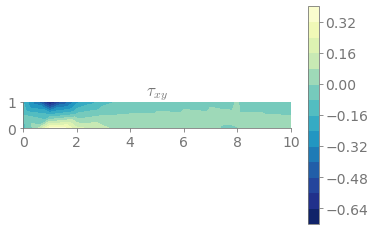

In [11]:
I=ppro.fields_plot(topo, coords, UVAB, E_nodes=None, S_nodes=SABF)

## Case 2: Displacement Control
In the following section, the comparison between the displacement fields are shown. In that case the value was obtained in the same positions for all nodes in the last step.
**Results for Python Code:**



In [12]:
from NR_Hyper2 import topo,coords,UV,E_nodes,S_nodes, UVAB, SABx,SPx,SABxy,SPxy,SABy,SPy,X,EABF,SABF

Step 0
Step 1
Step 2
Step 3
Step 4


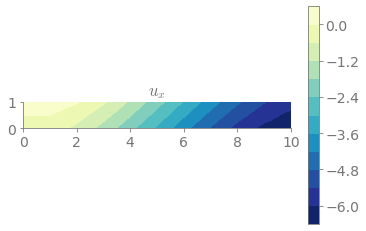

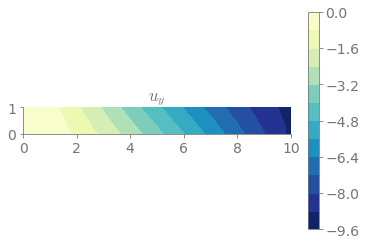

In [13]:
D=ppro.fields_plot(topo, coords, UV, E_nodes=None, S_nodes=None)

**Results for Abaqus CAE:**

The simulation in this case was executed using CPE8 elements, under the same material and load parameters that in the Python code.

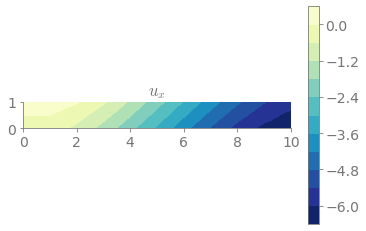

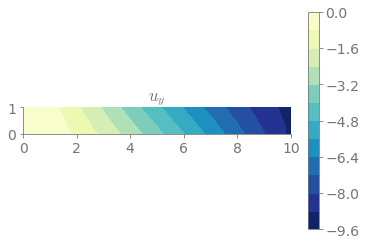

In [14]:
E=ppro.fields_plot(topo, coords, UVAB, E_nodes=None, S_nodes=None)

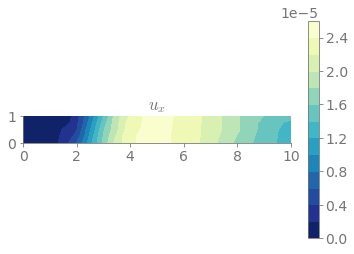

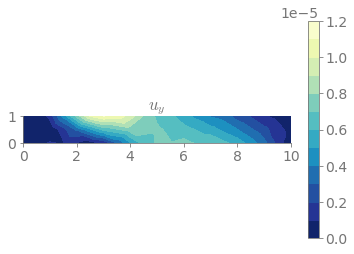

In [15]:
ERR=abs(UV-UVAB)
F=ppro.fields_plot(topo, coords, ERR, E_nodes=None, S_nodes=None)

**Stress Results Comparison:** In this case the stresses were directly compared on the centerline of the beam, extracting the information from the centerline.


Text(0.5, 0, 'Element')

<Figure size 432x288 with 0 Axes>

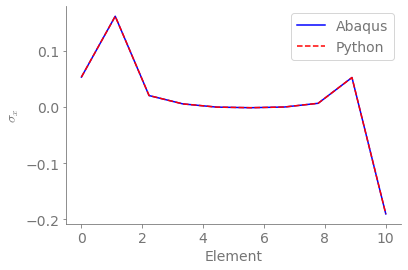

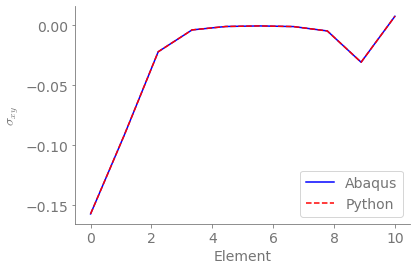

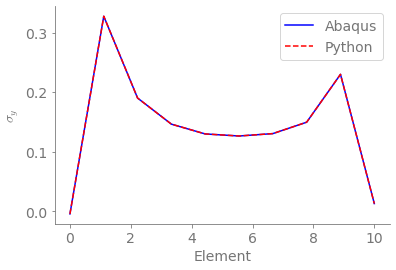

In [16]:
plt.figure(100)
#plt.rcParams["figure.figsize"]=20,20

plt.figure()
plt.plot(X,SABx,'b',label='Abaqus')
plt.plot(X,SPx,'--r',label='Python')
plt.ylabel(r"$\sigma_x$")
plt.xlabel('Element')
plt.legend()
E1=np.linalg.norm(SABx-SPx)

plt.figure()
plt.plot(X,SABxy,'b',label='Abaqus')
plt.plot(X,SPxy,'--r',label='Python')
plt.ylabel(r"$\sigma_{xy}$")
plt.xlabel('Element')
plt.legend()
E2=np.linalg.norm(SABxy-SPxy)

plt.figure()
plt.plot(X,SABy,'b',label='Abaqus')
plt.plot(X,SPy,'--r',label='Python')
plt.ylabel(r"$\sigma_y$")
plt.legend()
plt.xlabel('Element')

#### Addtional Plots:

The field plots for Stresses for both models are presented. The difference in stresses is noticeable, and may be related with the extrapolation procedure of the results from the Gauss Integration points to the nodes.

**Python:**

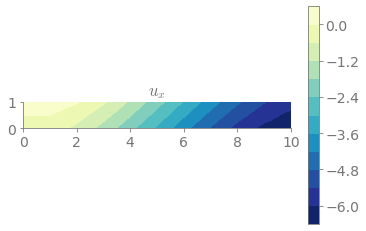

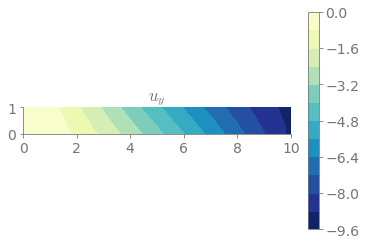

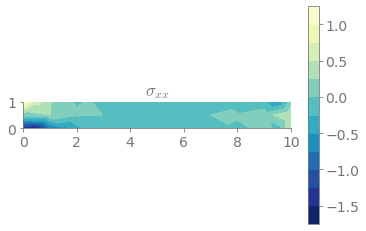

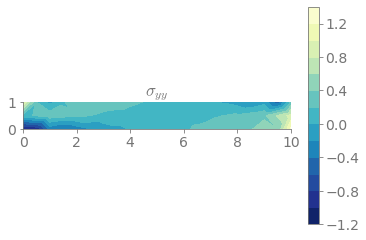

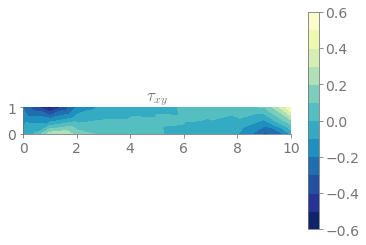

In [17]:
F=ppro.fields_plot(topo, coords, UV, E_nodes=None, S_nodes=S_nodes)

**Abaqus:**

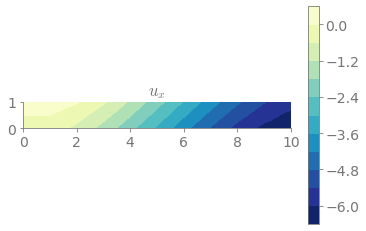

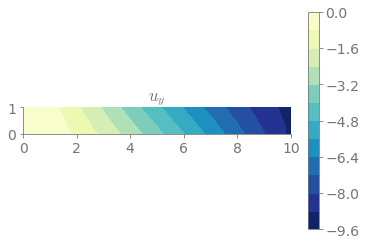

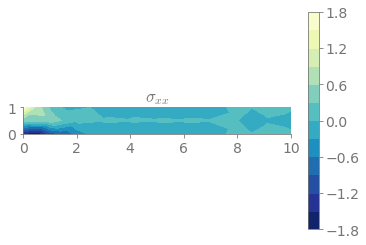

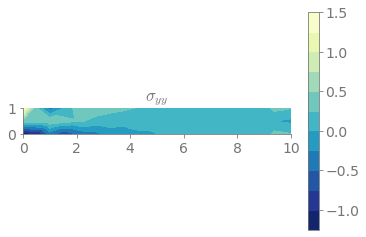

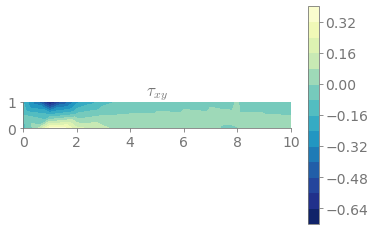

In [18]:
I=ppro.fields_plot(topo, coords, UVAB, E_nodes=None, S_nodes=SABF)

## Conclusions

- As can be seen in the report the code is suitable for solving elastostatic problems, it proved to converge to the same solution as other commercial software, with minimal error percentages, and no major increases in time.
- The development of a finite element code is very important for research porpouses, because it let the engineer to take control of the results, in if it is the case to make modifications based on particular needs.
- As future work, the code will be complexified to implement a zFEM methodology. With that step, the code code will be able to calcuate sensitivities of any system with respect to any input parameter.

### Referencias
Adicione las referencias que sean necesarias, como por ejemplo:

* Bathe, Klaus-Jürgen. (2006) Finite element procedures. Klaus-Jurgen Bathe. Prentice Hall International.

* Chandrupatla, Tirupathi R. (2002) Introduction to finite elements in engineering. Chandrupatla, Tirupathi R, Ashok D. Belegundu- 3rd ed. Prentice Hall International.

* Juan Gómez, Nicolás Guarín-Zapata (2018). SolidsPy: 2D-Finite Element Analysis with Python, <https://github.com/AppliedMechanics-EAFIT/SolidsPy>.

* Bower, A. (2010). Applied Mechanics of Solids. Boca Raton: CRC Press, https://doi.org/10.1201/9781439802489

In [19]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()